# Playing with CNN - MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
model = models.Sequential()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Input and Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())  # replaces Flatten + Dense(128)

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(test_images)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7929 - loss: 0.6562 - val_accuracy: 0.9843 - val_loss: 0.0483
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.9746 - loss: 0.0958 - val_accuracy: 0.9915 - val_loss: 0.0321
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9811 - loss: 0.0664 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9846 - loss: 0.0561 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9866 - loss: 0.0464 - val_accuracy: 0.9920 - val_loss: 0.0298
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9897 - loss: 0.0297
Test accuracy: 0.9916999936103821
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


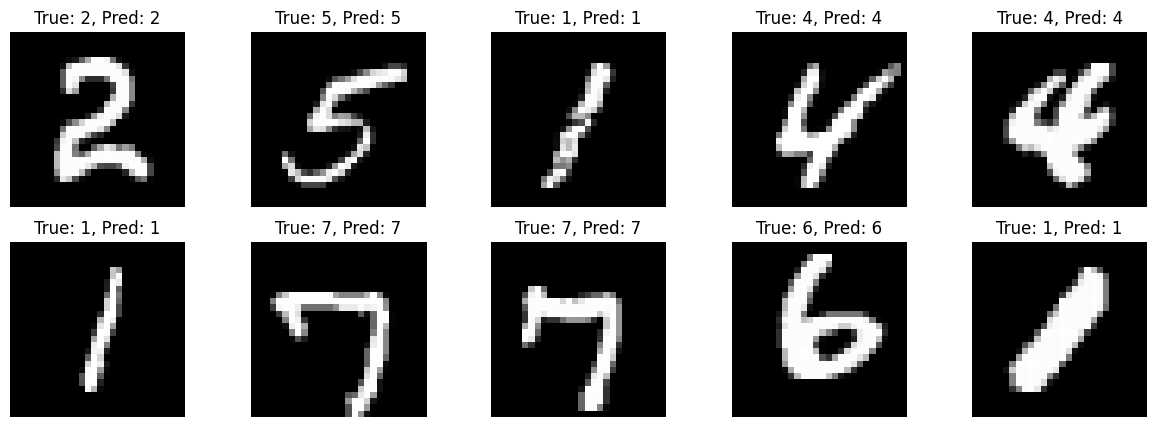

In [ ]:
# Display 10 random test images along with their true and predicted labels
num_images = 10
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]
random_predictions = predictions[random_indices]

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(random_test_labels[i])
    predicted_label = np.argmax(random_predictions[i])
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
plt.show()

## Wrong classification

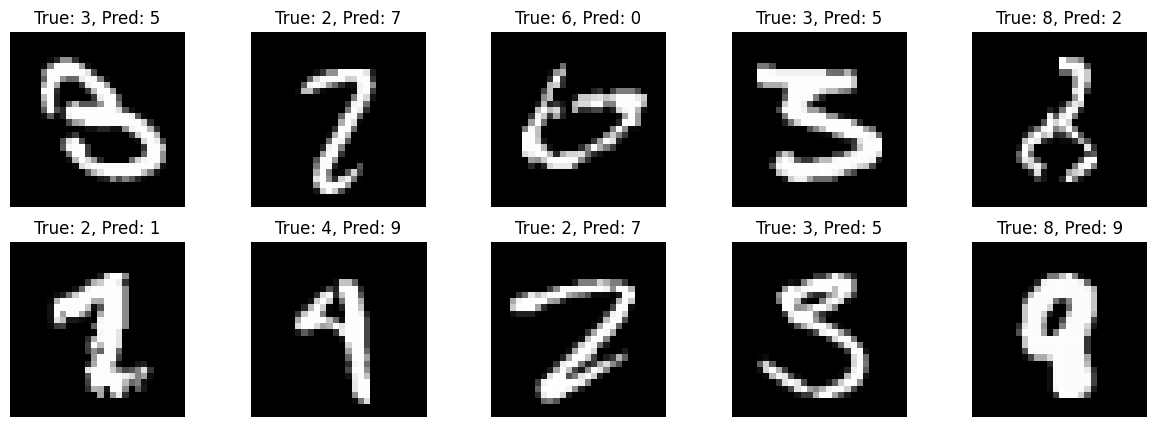

In [ ]:
# Assuming 'test_images', 'test_labels', and 'predictions' are already defined from previous code
# Convert one-hot encoded test_labels and predictions to class labels
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Find the indices where predictions do not match true labels
mismatch_indices = np.where(true_labels != predicted_labels)[0]

# Display examples where predictions do not match true labels
num_mismatches = len(mismatch_indices)
if num_mismatches > 0:
    plt.figure(figsize=(15, 5))
    num_images_to_show = min(10, num_mismatches)
    for i in range(num_images_to_show):
        index = mismatch_indices[i]
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[index]}, Pred: {predicted_labels[index]}")
        plt.axis('off')
    plt.show()
else:
    print("No mismatches found between true and predicted labels.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Shape of the activation: (1, 28, 28, 32)


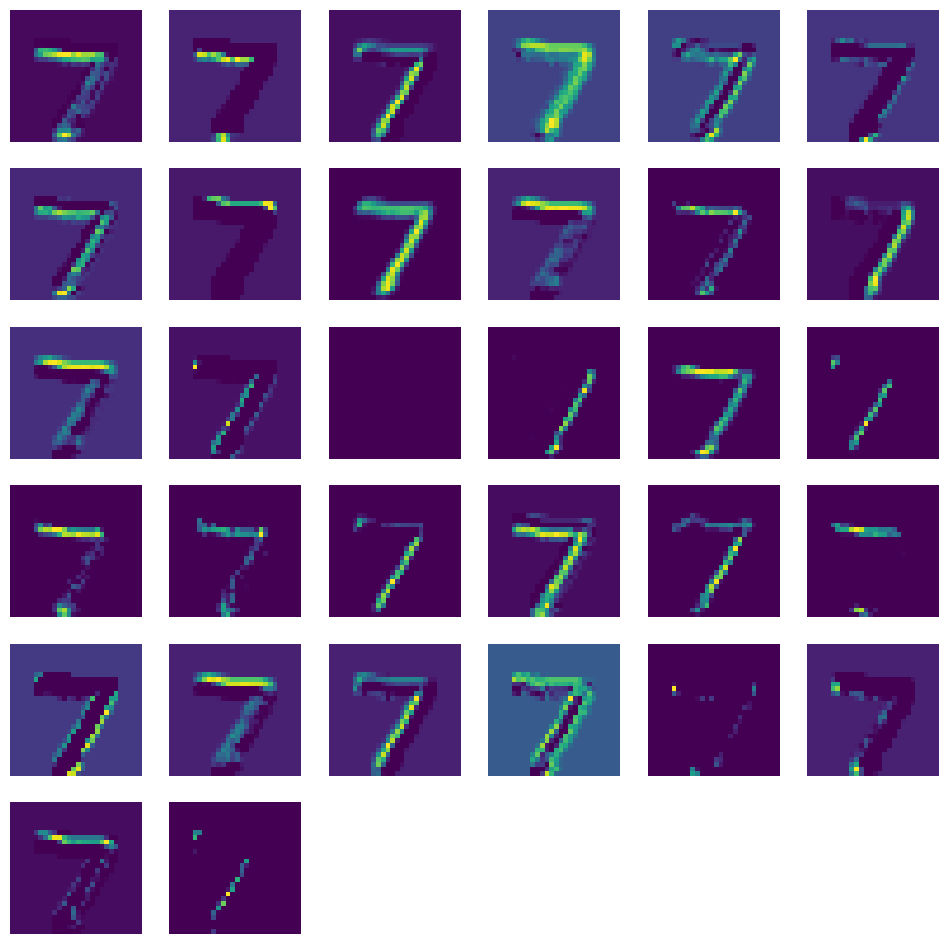

In [ ]:
from tensorflow.keras.models import Model

# Function to visualize activations
def visualize_activations(model, layer_idx, input_image):
    layer_outputs = [layer.output for layer in model.layers[:layer_idx+1]]
    # Use the input of the first layer of the original model as the input for the activation model
    activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)
    activations = activation_model.predict(input_image)
    first_layer_activation = activations[layer_idx]
    print(f"Shape of the activation: {first_layer_activation.shape}")
    num_filters = first_layer_activation.shape[-1]
    n_columns = 6
    n_rows = (num_filters + n_columns - 1) // n_columns  # Ensure enough rows
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(12, 12))
    for i in range(num_filters):
        ax = axes[i // n_columns, i % n_columns]
        ax.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
        ax.axis('off')
    # Remove empty subplots
    for i in range(num_filters, n_rows * n_columns):
        fig.delaxes(axes.flatten()[i])
    plt.show()

# Visualize the activations of the first convolutional layer for a sample input image
sample_image = test_images[0].reshape(1, 28, 28, 1)
visualize_activations(model, 1, sample_image)  # Ensure the correct layer index